# 🦠 Sistemas No Lineales: El Modelo Epidemiológico SIR

## 🎯 Objetivo

Comprender los fundamentos de los sistemas de EDOs **no lineales** y utilizar el **Modelo SIR** (Susceptible-Infectado-Recuperado) como caso de estudio principal para su planteamiento, categorización y análisis.

## 📝 Fundamentos de la No Linealidad

Un sistema de EDOs es **no lineal** si alguna de sus ecuaciones contiene términos que son:
1.  **Productos de las variables dependientes** (ej., $x_1 x_2$).
2.  **Potencias de las variables** (ej., $x^2$).
3.  **Funciones trascendentales** de las variables (ej., $\sin(x)$).

A diferencia de los sistemas lineales ($\mathbf{X}' = \mathbf{A}\mathbf{X}$), los sistemas no lineales no tienen una solución analítica general, por lo que su análisis se realiza mediante la **linealización** alrededor de los puntos de equilibrio (una técnica avanzada del curso).

---

## 🔬 Caso de Estudio: El Modelo SIR

El modelo SIR es un sistema de tres ecuaciones de primer orden que describe la dinámica de una población sujeta a una enfermedad infecciosa. La población total $N$ se divide en tres compartimentos. 

### Categorías (Variables Dependientes)

| Variable | Definición |
| :--- | :--- |
| $\mathbf{S(t)}$ | **Susceptibles:** Individuos que aún no han contraído la enfermedad, pero pueden contagiarse. |
| $\mathbf{I(t)}$ | **Infectados:** Individuos que tienen la enfermedad y pueden contagiar a otros. |
| $\mathbf{R(t)}$ | **Recuperados:** Individuos que se han recuperado y son inmunes (o han fallecido). |

In [5]:
# Importación de librerías para cálculo simbólico y numérico
import sympy as sp
import numpy as np
from sympy import Function, symbols
import matplotlib.pyplot as plt

# Definición de la variable independiente (t)
t = symbols('t')

# Definición de las variables dependientes (S, I, R)
S, I, R = symbols('S I R', cls=Function)
S = S(t)
I = I(t)
R = R(t)

# Definición de Parámetros del Modelo
beta, gamma, N = symbols('beta gamma N', positive=True)

print("Símbolos, variables y parámetros del Modelo SIR definidos.")

Símbolos, variables y parámetros del Modelo SIR definidos.


## Paso 1: Planteamiento del Sistema No Lineal

El sistema se basa en cómo fluyen los individuos entre los tres compartimentos.

### 1. Ecuación de Susceptibles ($\mathbf{S'}$)
Los susceptibles solo **disminuyen** al entrar en contacto con infectados.
* El término $\mathbf{\beta S I / N}$ representa la tasa de nuevos contagios.
$$
\mathbf{\frac{dS}{dt} = - \beta \frac{SI}{N}}
$$

### 2. Ecuación de Infectados ($\mathbf{I'}$)
La tasa de infectados **aumenta** por los nuevos contagios y **disminuye** por la recuperación.
$$
\mathbf{\frac{dI}{dt} = \beta \frac{SI}{N} - \gamma I}
$$

### 3. Ecuación de Recuperados ($\mathbf{R'}$)
Los recuperados solo **aumentan** por los individuos que salen de la categoría de infectados.
$$
\mathbf{\frac{dR}{dt} = \gamma I}
$$

### 🚨 La No Linealidad

El sistema es **no lineal** debido al término de interacción $\mathbf{S \cdot I}$ en las dos primeras ecuaciones. Este producto es lo que hace que la tasa de infección dependa de la cantidad de individuos en *ambas* categorías, haciendo imposible una solución analítica simple.

In [2]:
# Definición de las tres ecuaciones del sistema no lineal
dS_dt = -beta * S * I / N
dI_dt = (beta * S * I / N) - (gamma * I)
dR_dt = gamma * I

print("Ecuación de Susceptibles (S'):")
print(dS_dt)
print("\nEcuación de Infectados (I'):")
print(dI_dt)
print("\nEcuación de Recuperados (R'):")
print(dR_dt)

Ecuación de Susceptibles (S'):
-beta*I(t)*S(t)/N

Ecuación de Infectados (I'):
-gamma*I(t) + beta*I(t)*S(t)/N

Ecuación de Recuperados (R'):
gamma*I(t)


## Paso 2: Análisis Cualitativo y Gráfico

Para analizar la dinámica (la "curva" de la pandemia), se necesitan valores numéricos y el análisis de la **Tasa de Reproducción Básica ($\mathbf{R_0}$)**.

$$
\mathbf{R_0 = \frac{\beta}{\gamma}}
$$
* Si $\mathbf{R_0 > 1}$: La enfermedad crece (la curva sube, hay un brote).
* Si $\mathbf{R_0 < 1}$: La enfermedad decae (la curva baja, la epidemia se extingue).

Utilizaremos la integración numérica (función `odeint` de `scipy`, no incluida en SymPy) para visualizar una situación donde $\mathbf{R_0 > 1}$.

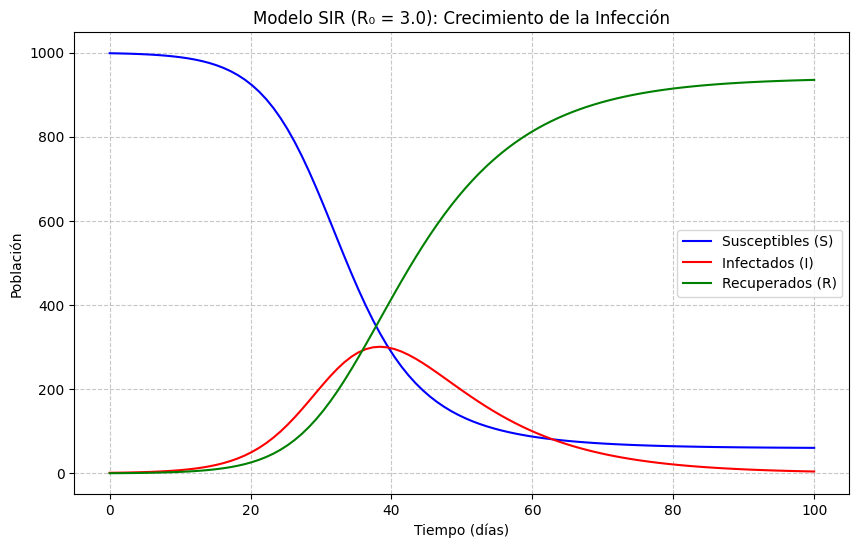

In [6]:
# Importación de la herramienta de integración numérica
from scipy.integrate import odeint

# Definición de la función que devuelve las derivadas (el sistema de EDOs)
def sir_model(Y, t, N_val, beta_val, gamma_val):
    S, I, R = Y
    dS_dt = -beta_val * S * I / N_val
    dI_dt = (beta_val * S * I / N_val) - (gamma_val * I)
    dR_dt = gamma_val * I
    return [dS_dt, dI_dt, dR_dt]

# --- Parámetros de Simulación (R₀ > 1) ---
N_pop = 1000  # Población total
beta_val = 0.3  # Tasa de contacto/infección
gamma_val = 0.1  # Tasa de recuperación
# R₀ = 0.3 / 0.1 = 3 (Habrá un brote)

# Condiciones Iniciales (t=0)
I0 = 1    # Un infectado inicial
R0 = 0    # Cero recuperados iniciales
S0 = N_pop - I0 - R0 # 999 susceptibles iniciales

Y0 = [S0, I0, R0]  # Vector de estado inicial

# Tiempos de simulación (100 días)
t_range = np.linspace(0, 100, 100)

# Resolver el sistema no lineal numéricamente
ret = odeint(sir_model, Y0, t_range, args=(N_pop, beta_val, gamma_val))
S_sim, I_sim, R_sim = ret.T

# --- Generación del Gráfico ---
plt.figure(figsize=(10, 6))
plt.plot(t_range, S_sim, label='Susceptibles (S)', color='blue')
plt.plot(t_range, I_sim, label='Infectados (I)', color='red')
plt.plot(t_range, R_sim, label='Recuperados (R)', color='green')

plt.title(f'Modelo SIR (R₀ = {beta_val/gamma_val:.1f}): Crecimiento de la Infección')
plt.xlabel('Tiempo (días)')
plt.ylabel('Población')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## 🌟 Conclusión y Análisis del Comportamiento

El gráfico ilustra el comportamiento típico de un sistema no lineal con $\mathbf{R_0 > 1}$:

1.  **Susceptibles (S):** La curva azul cae continuamente a medida que los individuos se contagian.
2.  **Infectados (I):** La curva roja es la **"curva epidémica"**. Primero crece exponencialmente debido al producto $S \cdot I$, alcanza un pico (el punto de inflexión del sistema), y luego decae al agotarse la población susceptible.
3.  **Recuperados (R):** La curva verde crece continuamente y tiende a un valor final asintótico, representando el total de personas que fueron infectadas y se recuperaron.

El análisis de estos puntos de inflexión y del comportamiento a largo plazo solo es posible gracias a la **transformación del problema complejo en un sistema de EDOs no lineales**.